# Types of Features

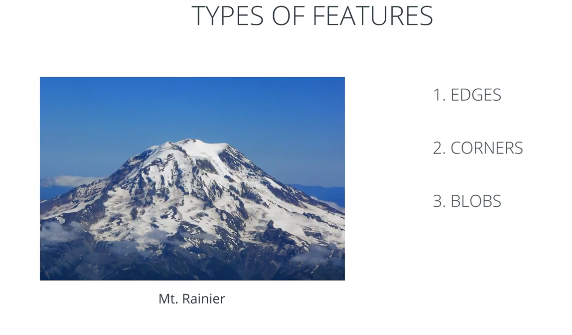

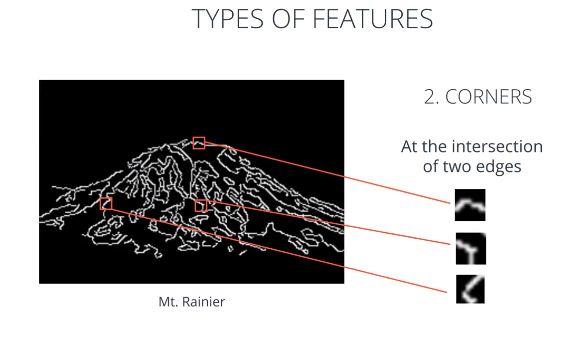

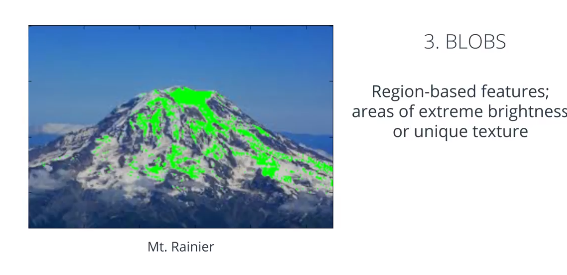

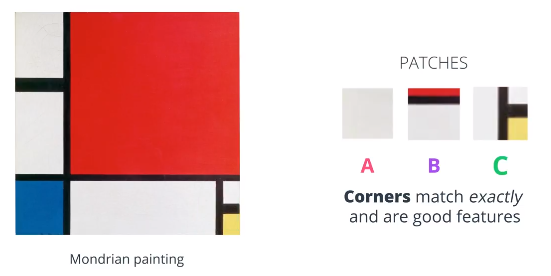

# Corner Detectors

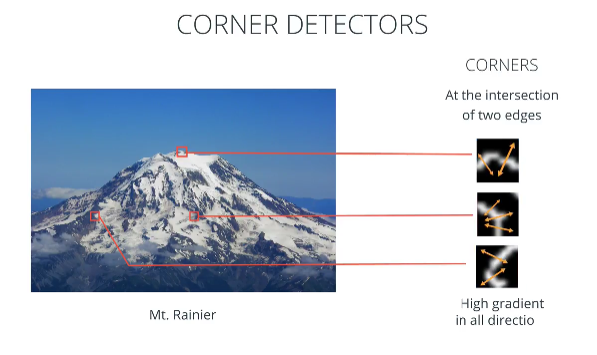

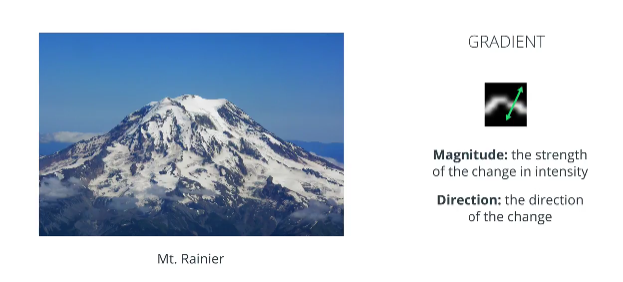

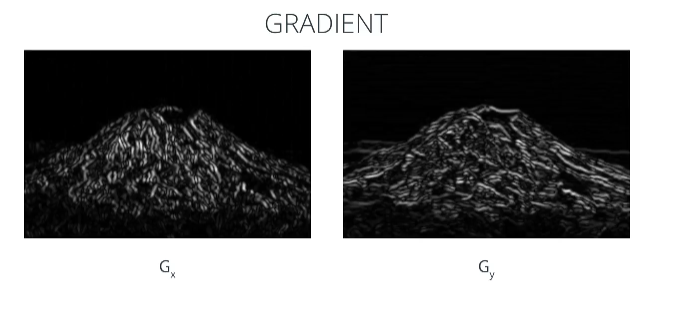

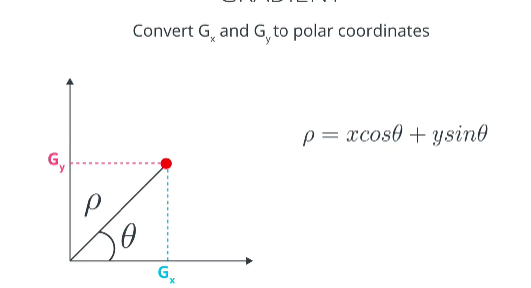

rho = sqrt(Gx^2 + Gy^2)

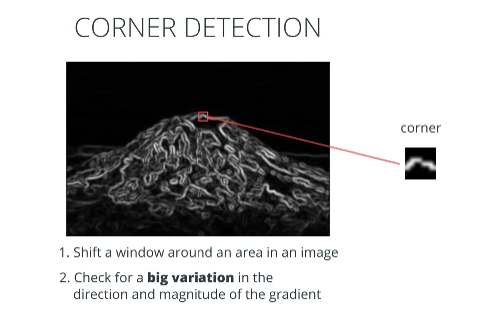

## Harris Corner Detection

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

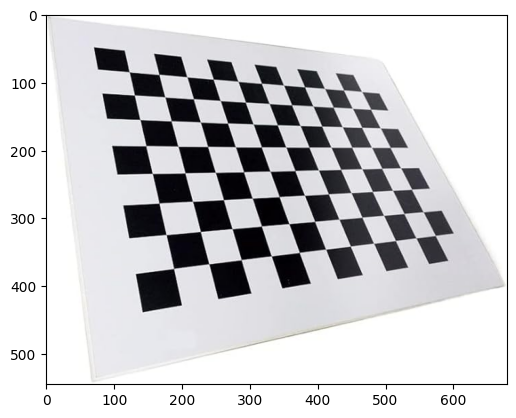

In [3]:
# Read in the image
image = cv2.imread('img/chess_board.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

### Detect corners

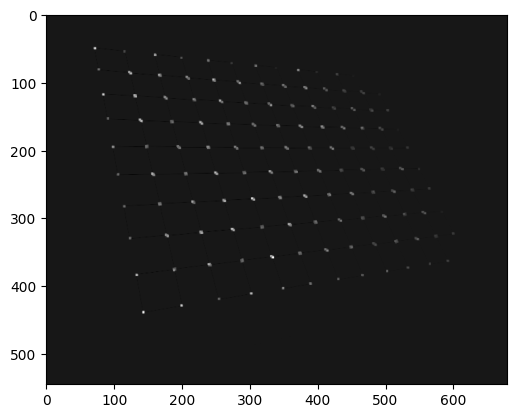

In [4]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

### Extract and display strong corners

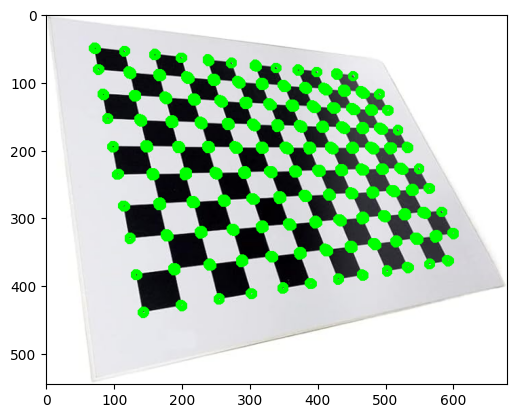

In [18]:
thresh = 0.01*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 5, (0,255,0), 2)

plt.imshow(corner_image)

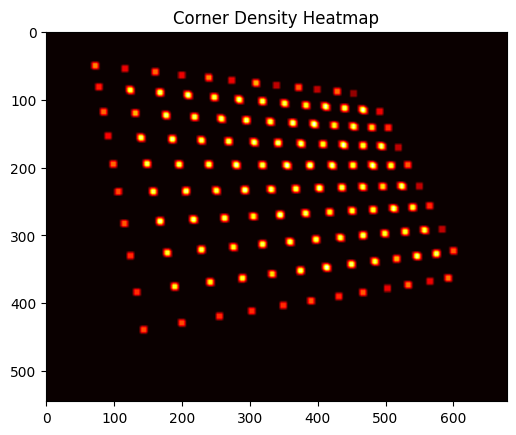

In [9]:
# Create a heatmap of corner density
corner_density = cv2.filter2D(corner_map, -1, np.ones((10, 10)))
plt.imshow(corner_density, cmap='hot')
plt.title('Corner Density Heatmap')
plt.show()

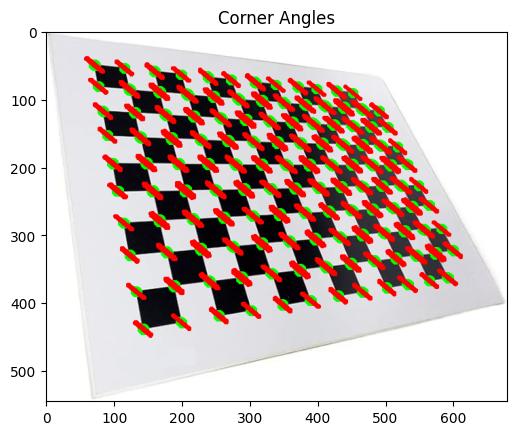

In [24]:
corner_angles = np.arctan2(j - dst.shape[0] / 2, i - dst.shape[1] / 2)
corner_angles = np.degrees(corner_angles)

# Iterate through all the corners and draw lines for the angles
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if dst[j, i] > thresh:
            angle = corner_angles  # Use the same angle for all corners
            line_length = 15
            x1 = int(i - line_length * np.cos(np.radians(angle)))
            y1 = int(j - line_length * np.sin(np.radians(angle)))
            x2 = int(i + line_length * np.cos(np.radians(angle)))
            y2 = int(j + line_length * np.sin(np.radians(angle)))
            cv2.line(corner_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.imshow(corner_image)
plt.title('Corner Angles')
plt.show()

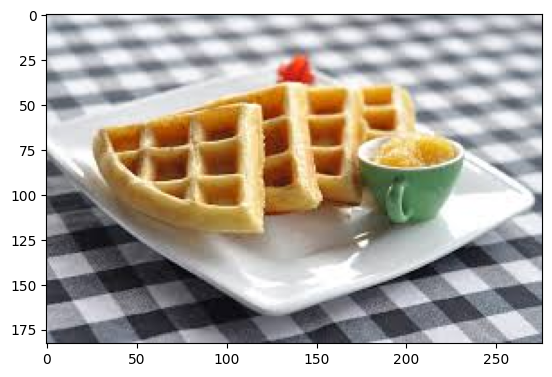

In [30]:
# Read in the image
image = cv2.imread('img/waffle.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

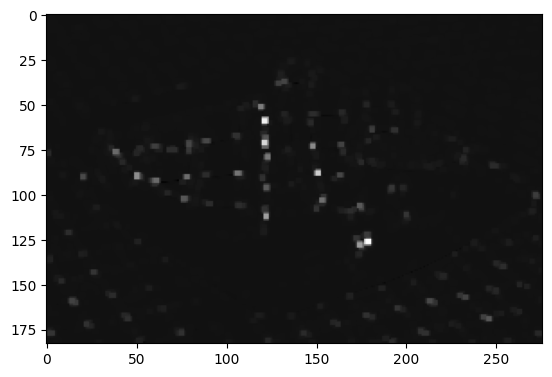

In [36]:
# Convert to grayscale
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# Detect corners 
dst = cv2.cornerHarris(gray, 2, 3, 0.02)

# Dilate corner image to enhance corner points
dst = cv2.dilate(dst,None)

plt.imshow(dst, cmap='gray')

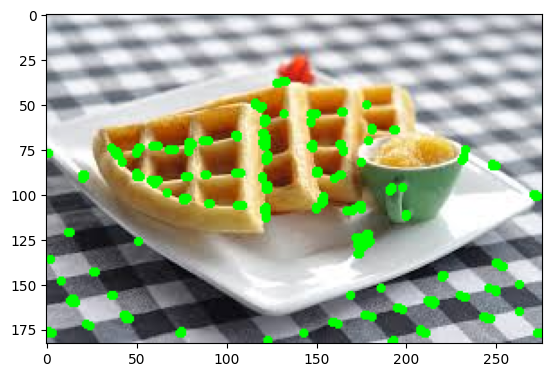

In [42]:
thresh = 0.06*dst.max()

# Create an image copy to draw corners on
corner_image = np.copy(image_copy)

# Iterate through all the corners and draw them on the image (if they pass the threshold)
for j in range(0, dst.shape[0]):
    for i in range(0, dst.shape[1]):
        if(dst[j,i] > thresh):
            # image, center pt, radius, color, thickness
            cv2.circle( corner_image, (i, j), 1, (0,255,0), 1)

plt.imshow(corner_image)

# Dilation and Erosion

Dilation and erosion are known as **morphological operations**. They are often performed on binary images, similar to contour detection. Dilation enlarges bright, white areas in an image by adding pixels to the perceived boundaries of objects in that image. Erosion does the opposite: it removes pixels along object boundaries and shrinks the size of objects.

Often these two operations are performed in sequence to enhance important object traits!

## Dilation

To dilate an image in OpenCV, you can use the dilate function and three inputs: an original binary image, a kernel that determines the size of the dilation (None will result in a default size), and a number of iterations to perform the dilation (typically = 1). In the below example, we have a 5x5 kernel of ones, which move over an image, like a filter, and turn a pixel white if any of its surrounding pixels are white in a 5x5 window! We’ll use a simple image of the cursive letter “j” as an example.


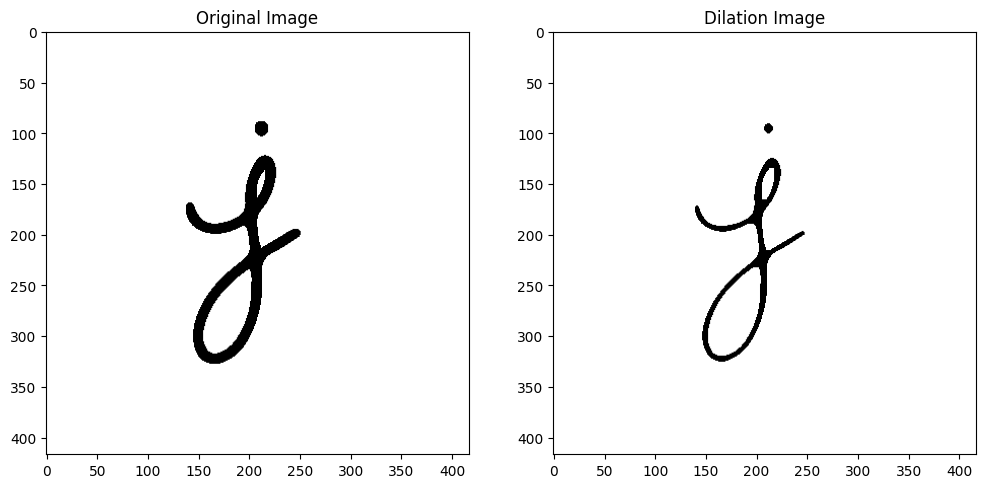

In [3]:
# Reads in a binary image
image = cv2.imread('img/j.png', 0) 

# Create a 5x5 kernel of ones
kernel = np.ones((5,5),np.uint8)

# Dilate the image
dilation = cv2.dilate(image, kernel, iterations = 1)

# Create a subplot with two side-by-side images
plt.figure(figsize=(12, 6))

# Plot the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

# Plot the 'dilation' image on the right
plt.subplot(1, 2, 2)
plt.imshow(dilation, cmap='gray')  # Use 'cmap' if 'dilation' is a grayscale image
plt.title('Dilation Image')

plt.show()

### Erosion

To erode an image, we do the same but with the erode function.

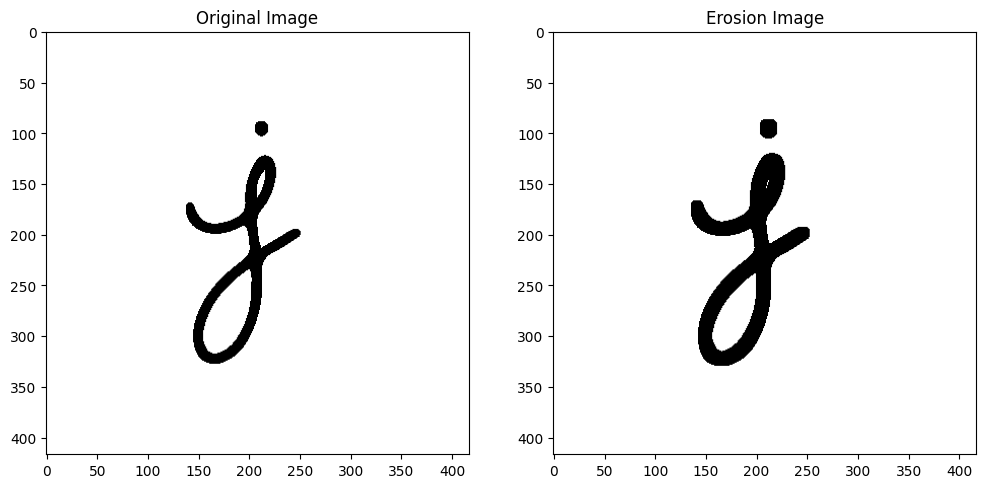

In [53]:
# Erode the image
erosion = cv2.erode(image, kernel, iterations = 1)

# Create a subplot with two side-by-side images
plt.figure(figsize=(12, 6))

# Plot the original image on the left
plt.subplot(1, 2, 1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')

# Plot the 'dilation' image on the right
plt.subplot(1, 2, 2)
plt.imshow(erosion, cmap='gray')  # Use 'cmap' if 'dilation' is a grayscale image
plt.title('Erosion Image')

plt.show()

### Opening

As mentioned, above, these operations are often combined for desired results! One such combination is called **opening**, which is **erosion followed by dilation**. This is useful in noise reduction in which erosion first gets rid of noise (and shrinks the object) then dilation enlarges the object again, but the noise will have disappeared from the previous erosion!

To implement this in OpenCV, we use the function morphologyEx with our original image, the operation we want to perform, and our kernel passed in.

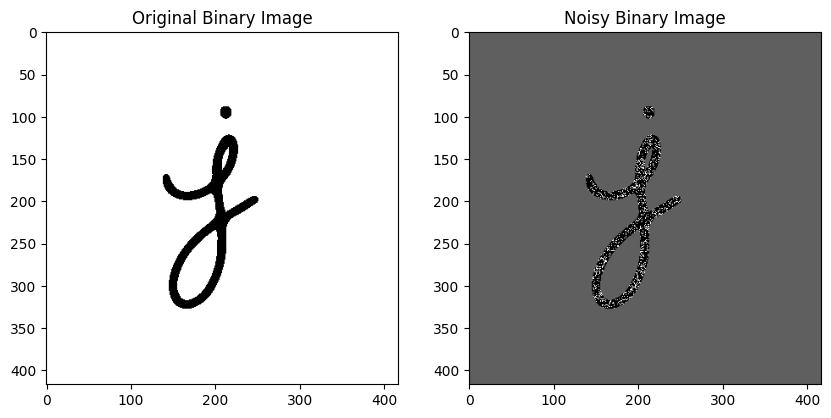

In [10]:
# Add noise to black dots
noise_intensity = 0.2  # Adjust this value as needed
noisy_image = np.copy(image)
height, width = noisy_image.shape

# Iterate through the image and add noise to black pixels
for y in range(height):
    for x in range(width):
        if noisy_image[y, x] == 0:  # Check if it's a black pixel
            if np.random.rand() < noise_intensity:
                noisy_image[y, x] = 255  # Change it to white (255)

# Display the original and noisy images using plt
plt.figure(figsize=(10, 5))

# Original binary image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Binary Image')

# Noisy binary image
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Binary Image')

plt.show()

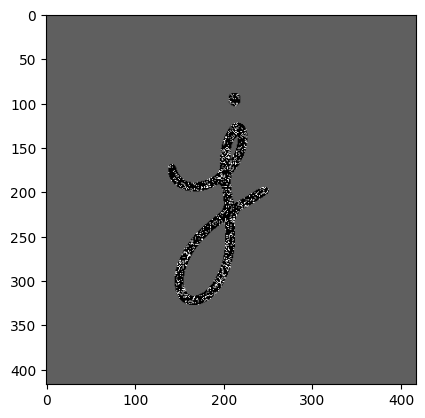

In [14]:
plt.imshow(noisy_image, cmap='gray')

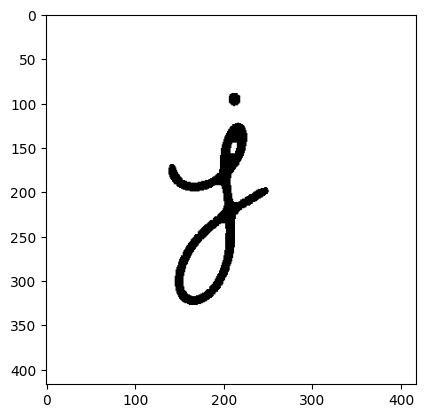

In [16]:
opening = cv2.morphologyEx(noisy_image, cv2.MORPH_OPEN, kernel)

plt.imshow(opening, cmap='gray')

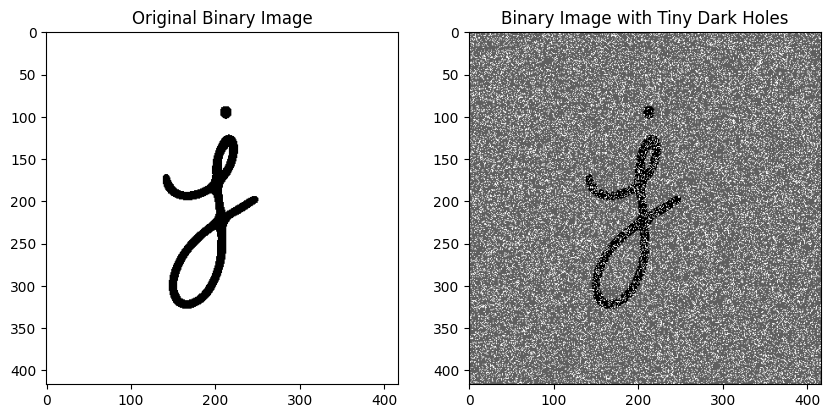

In [23]:
# Invert the binary image
inverted_image = cv2.bitwise_not(image)

# Add tiny dark holes inside the inverted image
hole_intensity = 0.2  # Adjust this value for the darkness of the holes
height, width = inverted_image.shape

for y in range(height):
    for x in range(width):
        if np.random.rand() < hole_intensity:
            inverted_image[y, x] = 0  # Change it to black (0)

# Invert the image back to the original orientation
result_image = cv2.bitwise_not(inverted_image)

# Display the original and modified images using plt
plt.figure(figsize=(10, 5))

# Original binary image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Binary Image')

# Binary image with tiny dark holes
plt.subplot(1, 2, 2)
plt.imshow(result_image, cmap='gray')
plt.title('Binary Image with Tiny Dark Holes')

plt.show()

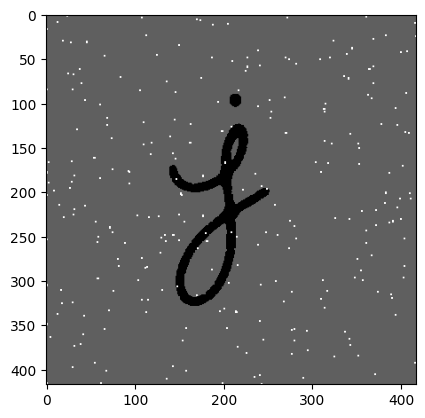

In [26]:
open_mor = cv2.morphologyEx(result_image, cv2.MORPH_OPEN, kernel)

plt.imshow(open_mor, cmap='gray')

### Closing

Closing is the reverse combination of opening; it’s **dilation followed by erosion**, which is useful in closing small holes or dark areas within an object.

Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

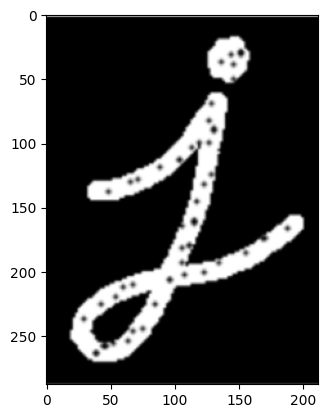

In [32]:
img = cv2.imread('img/close_j.png', 0)
plt.imshow(img, cmap='gray')

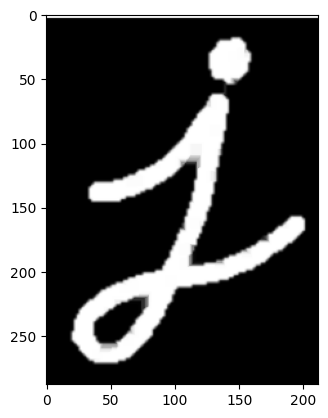

In [35]:
# Create a 5x5 kernel of ones
kernel = np.ones((8,8),np.uint8)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.imshow(closing, cmap='gray')

Many of these operations try to extract better (less noisy) information about the shape of an object or enlarge important features, as in the case of corner detection!

# Image Segmentation

Now that we are familiar with a few simple feature types, it may be useful to look at how we can group together different parts of an image by using these features. Grouping or segmenting images into distinct parts is known as image segmentation.

The simplest case for image segmentation is in background subtraction. In video and other applications, it is often the case that a human has to be isolated from a static or moving background, and so we have to use segmentation methods to distinguish these areas. Image segmentation is also used in a variety of complex recognition tasks, such as in classifying every pixel in an image of the road.

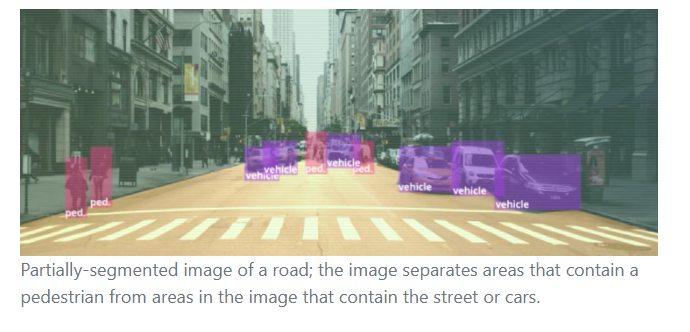

# Image Contours

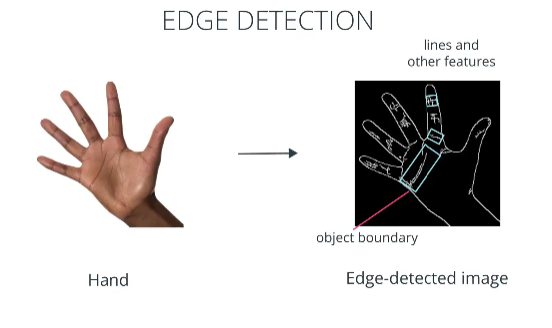

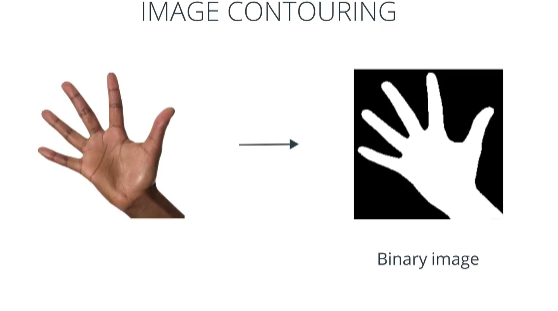

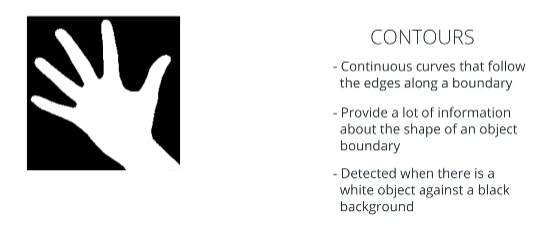

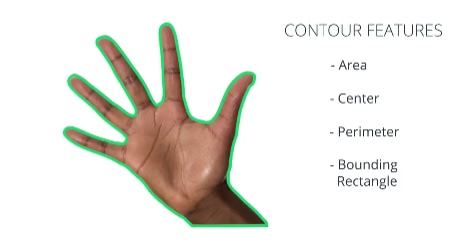

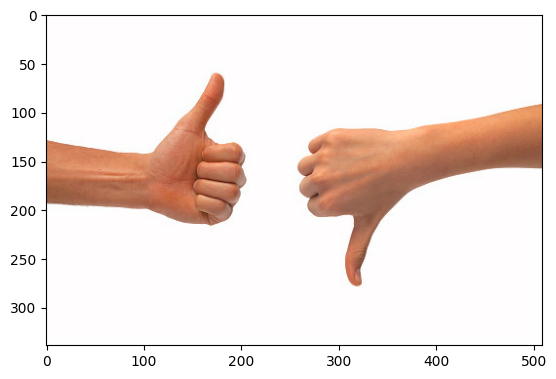

In [36]:
# Read in the image
image = cv2.imread('img/thumbs_up_down.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Produce a binary image for finding contours

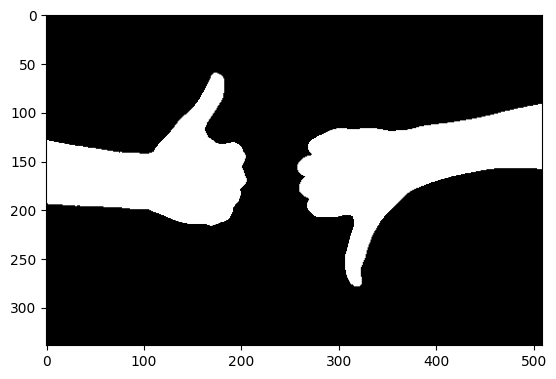

In [37]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

### Find and draw the contours

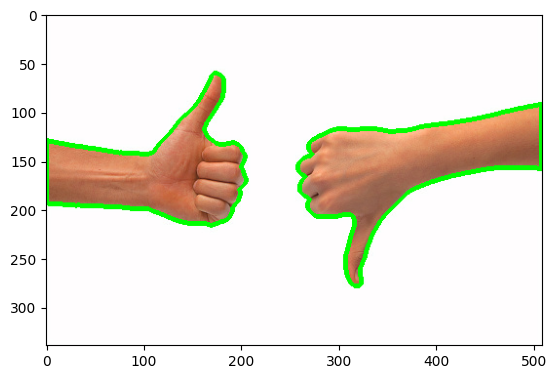

In [39]:
# Find contours from thresholded, binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

In [47]:
len(contours)

2

## Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties.

### Orientation
The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the angle from that shape.

Fit an ellipse to a contour and extract the angle from that ellipse

(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

In [51]:
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    
    # Create an empty list to store the angles in
    angles = []
    
    for contour in contours:
        # Fit an ellipse to the contour
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)
            # Extract the orientation angle from the fitted ellipse
            angle = ellipse[2]
            angles.append(angle)
    
    return angles

# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


## Bounding Rectangle

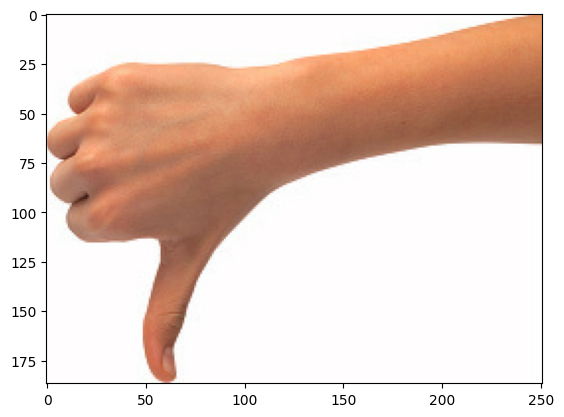

In [42]:
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selected_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    
    # Check if a valid contour is provided
    if selected_contour is not None:
        # Find the bounding rectangle of the selected contour
        x, y, w, h = cv2.boundingRect(selected_contour)
        
        # Crop the image using the bounding rectangle dimensions
        cropped_image = image[y:y+h, x:x+w]
        
        return cropped_image

    # If no valid contour is provided, return None
    return None

# Assuming you have a selected contour
# Replace this with the actual selected contour from your list of contours
selected_contour = contours[0]  # Replace with the contour you want to use

# If you've selected a contour
if selected_contour is not None:
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)

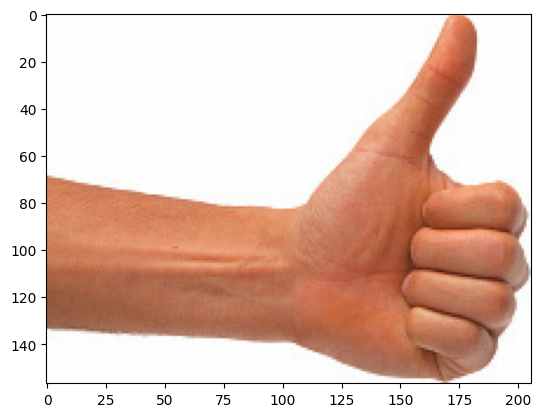

In [45]:
def right_hand_crop(image, selected_contour):
    """
    Right hand crop 
    :param image: the original image
    :param selected_contour: the contour that will be used for cropping the right hand
    :return: cropped_image, the cropped image around the right hand
    """
    
    # Check if a valid contour is provided
    if selected_contour is not None:
        # Find the bounding rectangle of the selected contour
        x, y, w, h = cv2.boundingRect(selected_contour)
        
        # Crop the image using the bounding rectangle dimensions
        cropped_image = image[y:y+h, x:x+w]
        
        return cropped_image

    # If no valid contour is provided, return None
    return None

# Assuming you have a selected contour for the right hand
# Replace this with the actual selected contour from your list of contours
selected_right_hand_contour = contours[1]  # Replace with the contour for the right hand

# If you've selected a contour for the right hand
if selected_right_hand_contour is not None:
    # Call the crop function with that contour passed in as a parameter
    cropped_right_hand_image = right_hand_crop(image, selected_right_hand_contour)
    plt.imshow(cropped_right_hand_image)

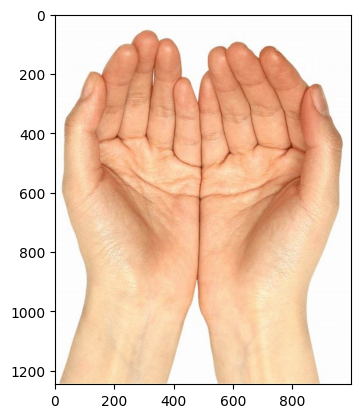

In [52]:
# Read in the image
image = cv2.imread('img/hand.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

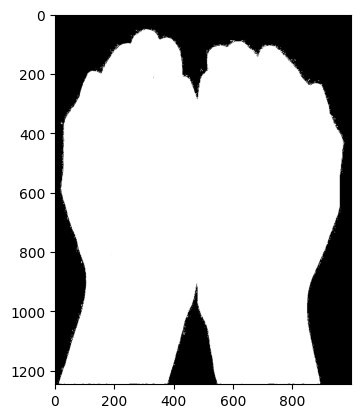

In [65]:
# Convert to grayscale
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 249, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

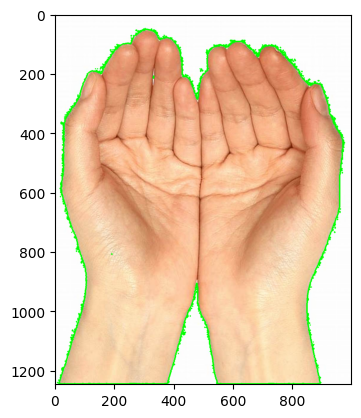

In [67]:
# Find contours from thresholded, binary image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)

plt.imshow(contours_image)

# K-means Clustering

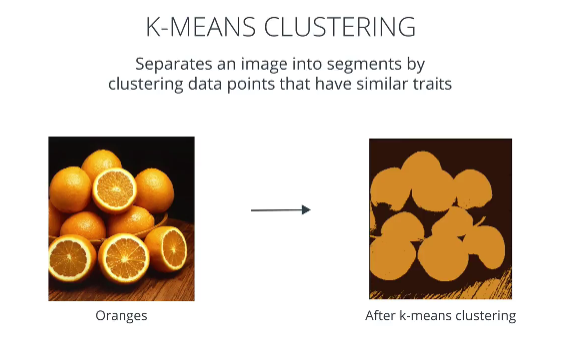

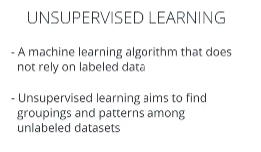

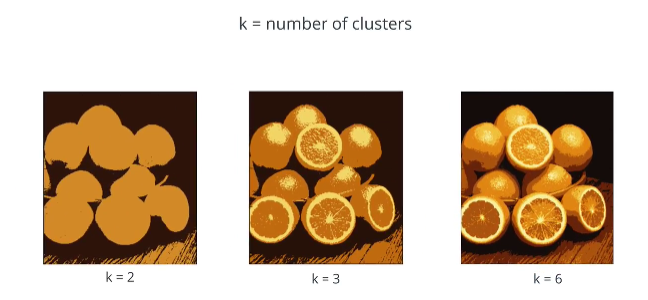

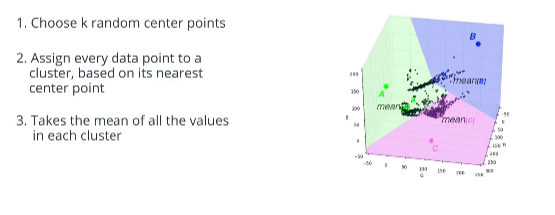

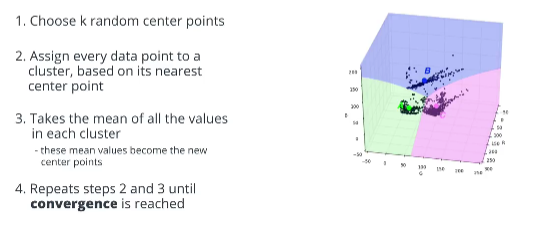

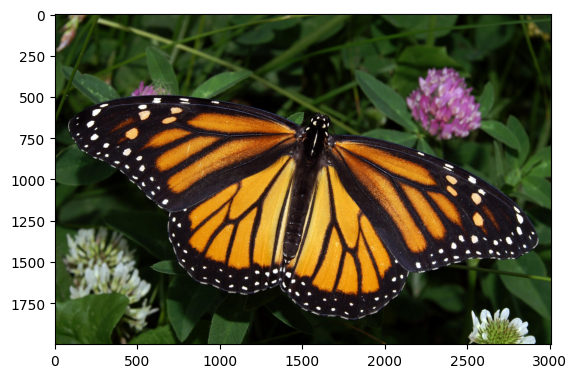

In [68]:
image = cv2.imread('img/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [71]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

In [78]:
image.shape

(2000, 3008, 3)

In [73]:
# Convert to float type
pixel_vals = np.float32(pixel_vals)

In [79]:
pixel_vals

array([[33., 66., 23.],
       [33., 66., 23.],
       [33., 66., 23.],
       ...,
       [23., 44., 11.],
       [24., 43., 11.],
       [24., 43., 11.]], dtype=float32)

In [77]:
pixel_vals.shape

(6016000, 3)

### Implement k-means clustering

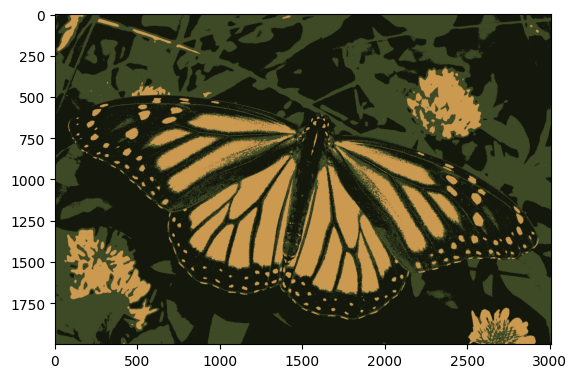

In [80]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# then perform k-means clustering
k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

In [86]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

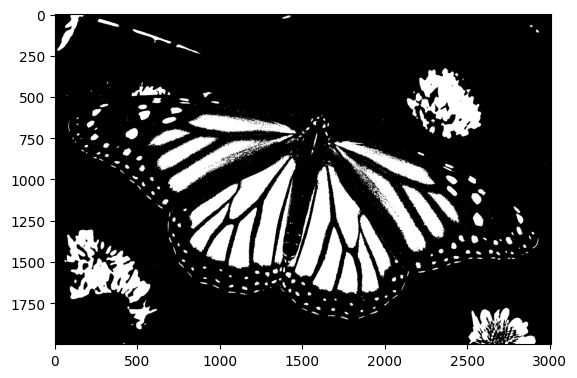

In [87]:
plt.imshow(labels_reshape==0, cmap='gray')

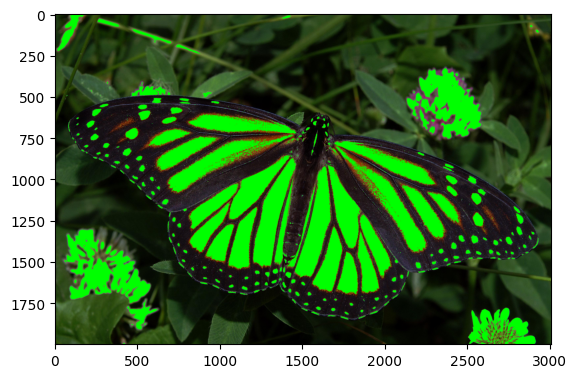

In [88]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)

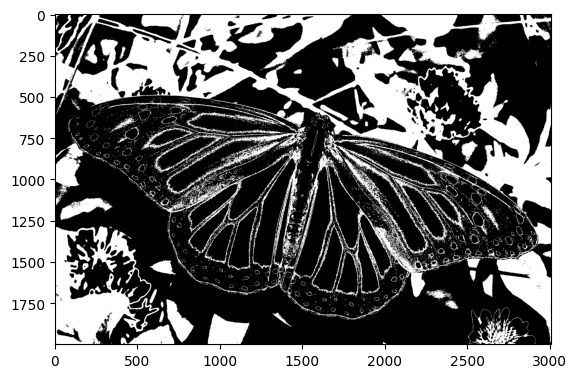

In [89]:
plt.imshow(labels_reshape==1, cmap='gray')

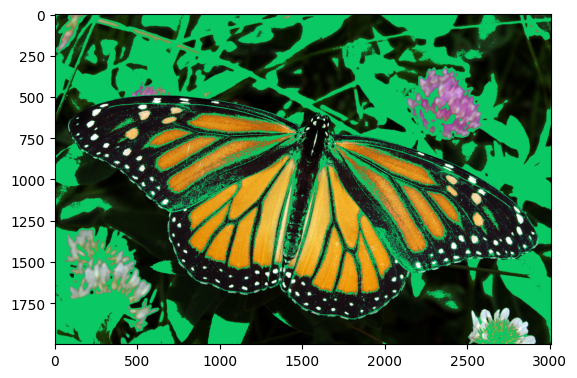

In [97]:
# mask an image segment by cluster

cluster = 1 

masked_image = np.copy(image)

masked_image[labels_reshape == cluster] = [10, 200, 100]

plt.imshow(masked_image)

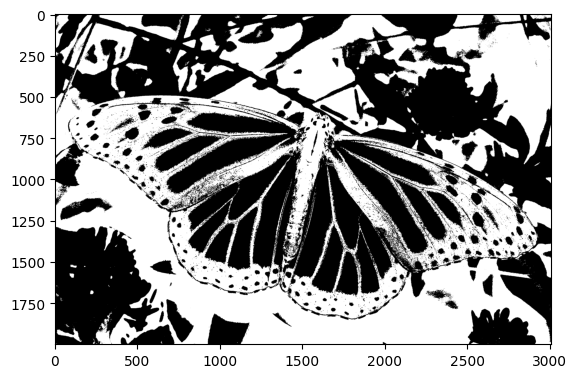

In [92]:
plt.imshow(labels_reshape==2, cmap='gray')

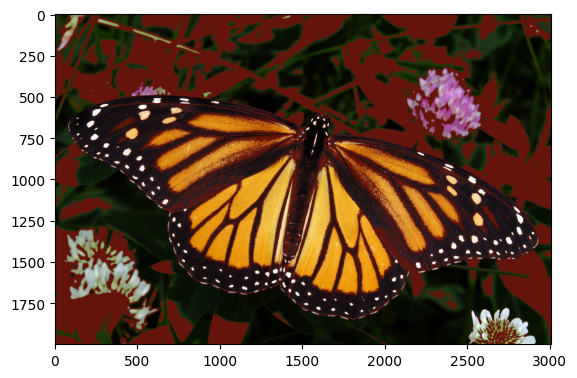

In [96]:
# mask an image segment by cluster

cluster = 1 

masked_image = np.copy(image)

masked_image[labels_reshape == cluster] = [100, 20, 10]

plt.imshow(masked_image)

#### On Other Images

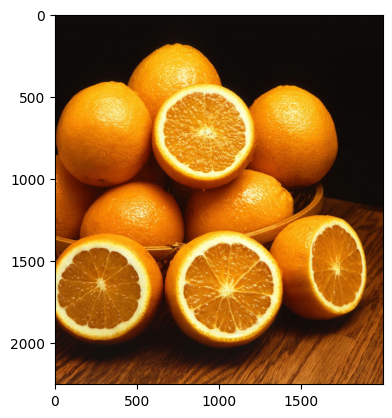

In [98]:
image = cv2.imread('img/oranges.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [99]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)

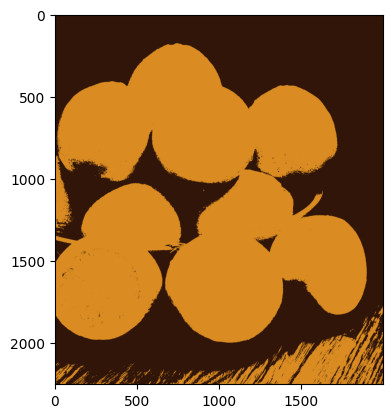

In [123]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# then perform k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

In [108]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

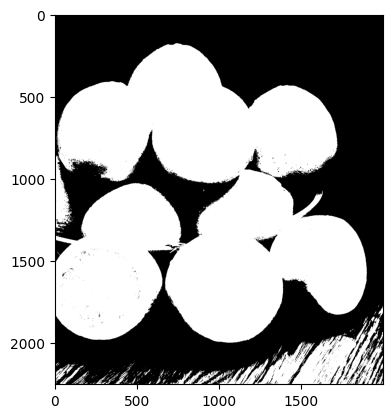

In [124]:
plt.imshow(labels_reshape==1, cmap='gray')

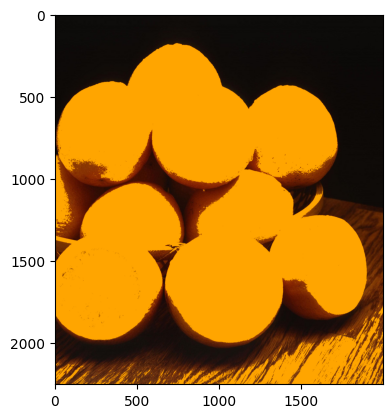

In [125]:
# mask an image segment by cluster

cluster = 1 # the first cluster

masked_image = np.copy(image)
# turn the mask orange!
masked_image[labels_reshape == cluster] = [255, 165, 0]

plt.imshow(masked_image)

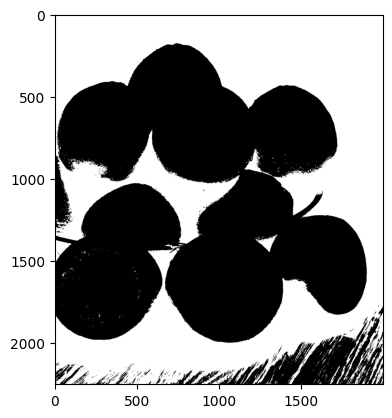

In [126]:
plt.imshow(labels_reshape==0, cmap='gray')

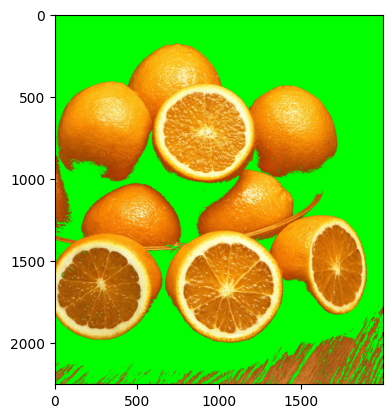

In [127]:
cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)